In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('Pre-processed Dataset/train.csv', encoding='latin-1', index_col=0)
test = pd.read_csv('Pre-processed Dataset/test.csv', encoding='latin-1', index_col=0)

In [ ]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text,sentiment,hash,mentions,senti
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie phil_gahan chrisitv,neutral,NaN,MeNyrbie Phil_Gahan Chrisitv,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...,positive,NaN,NaN,2
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...,positive,NaN,NaN,2
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empty please dont panic enough ...,positive,COVID19france COVID_19 COVID19 coronavirus con...,NaN,2
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket covid outbreak im paranoi...,negative,COVID19 coronavirus CoronavirusFrance restezch...,NaN,1


In [ ]:
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text,sentiment,hash,mentions,senti
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,trending new yorkers encounter empty supermark...,negative,coronavirus,NaN,1
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,couldnt find hand sanitizer fred meyer turned ...,positive,Amazon coronavirus,NaN,2
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,find protect loved ones coronavirus,positive,coronavirus,NaN,2
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,panic buying hits newyork city anxious shopper...,negative,Panic NewYork healthcare BigApple coronavirus ...,NaN,1
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,toiletpaper dunnypaper coronavirus coronavirus...,neutral,toiletpaper dunnypaper coronavirus coronavirus...,NaN,0


In [ ]:
train['text'] = train['text'].values.astype(str)
test['text'] = test['text'].values.astype(str)

In [ ]:
 # Tokenize words
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()

In [ ]:
tokenizer.fit_on_texts(train.text)

In [ ]:
X_train = tokenizer.texts_to_sequences(train.text)
X_test  = tokenizer.texts_to_sequences(test.text)

In [ ]:
y_train_1 = train['senti'].values.astype(int)
y_test_1 = test['senti'].values.astype(int)

In [ ]:
# One-hot encoding the labels
from keras.utils import to_categorical
y_train = to_categorical(y_train_1)
y_test = to_categorical(y_test_1)

In [ ]:
 # Pad sequences with zeros
from keras.preprocessing.sequence import pad_sequences

In [ ]:
X_train = pad_sequences(X_train, padding='post', maxlen=41)
X_test = pad_sequences(X_test, padding='post', maxlen=41)

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
vocab_size

59192

In [ ]:
from keras.models import Sequential
from keras import layers

In [ ]:
embedding_dim = 50

In [ ]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=41))
model.add(layers.Conv1D(200, 3, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 41, 50)            2959600   
_________________________________________________________________
conv1d (Conv1D)              (None, 39, 200)           30200     
_________________________________________________________________
global_max_pooling1d (Global (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                2010      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
Total params: 2,991,843
Trainable params: 2,991,843
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=10, verbose=False, validation_data=(X_test, y_test), batch_size=10)

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9976
Testing Accuracy:  0.7680


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

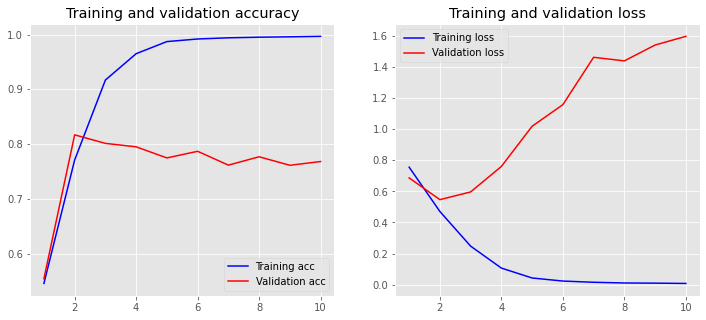

In [ ]:
plot_history(history)